In [35]:
import sys
sys.path.insert(0, '../')

import os
import numpy as np
import pandas as pd
import utilities as utils
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
# store the path
path_full = os.environ.get("ORI_PATH")
path_mask = os.path.join(path_full, "datasets", "cleaned", "mask_image")
path_data = os.path.join(path_full, "data")

In [ ]:
mask_images = os.listdir(path_mask)
cdr_data = pd.DataFrame(data=mask_images, columns=["id"])

cdr_data["path"] = cdr_data["id"].apply(lambda x: os.path.join(path_mask, x))
cdr_data["id"] = cdr_data["id"].apply(lambda x: x.split(".")[0])
cdr_data["label"] = cdr_data["id"].apply(lambda x: x.split("_")[1])
cdr_data["eye_side"] = cdr_data["id"].apply(lambda x: x.split("_")[3])

cdr_data.head(5)

,id,path,label,eye_side
0,fff_0_111784_l_y_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
1,fff_0_111784_r_y_mask,D:\Programming\Python\Research Prof. Anindita\...,0,r
2,fff_0_113060_l_1_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
3,fff_0_113060_l_2_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l
4,fff_0_113060_l_3_mask,D:\Programming\Python\Research Prof. Anindita\...,0,l


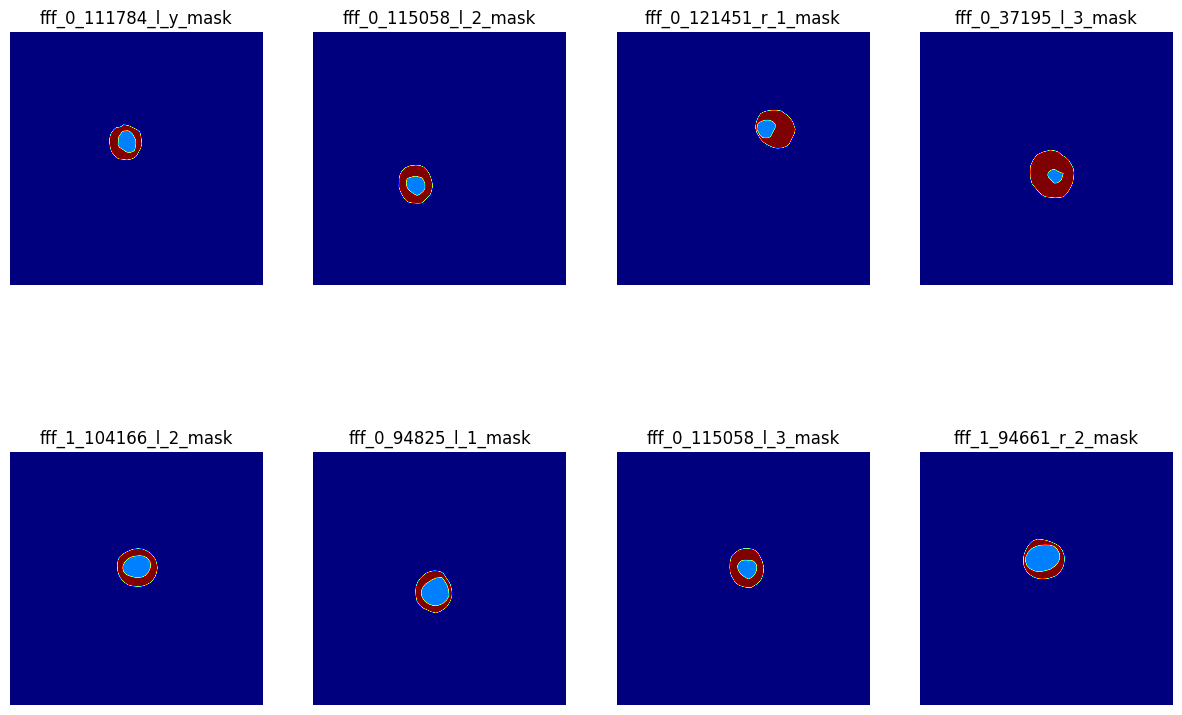

In [24]:
plt.figure(figsize=(15, 10))
fig_rows = 2
fig_cols = 4
for i in range(fig_rows * fig_cols):
    choice = randint(0, len(cdr_data))
    plt.subplot(fig_rows,fig_cols, i+1)
    plt.imshow(plt.imread(cdr_data["path"][choice]), cmap='jet')
    plt.title(cdr_data["id"][choice])
    plt.axis('off')

In [31]:
mask_sample = cdr_data.sample(1)
mask_sample

,id,path,label,eye_side
290,fff_1_69990_r_1_mask,D:\Programming\Python\Research Prof. Anindita\...,1,r


In [42]:
mask = tf.io.read_file(mask_sample["path"].values[0])
mask = tf.image.decode_png(mask, channels=1)
mask = tf.image.resize(mask, [512, 512], method='nearest')
mask = tf.cast(mask, tf.int32)

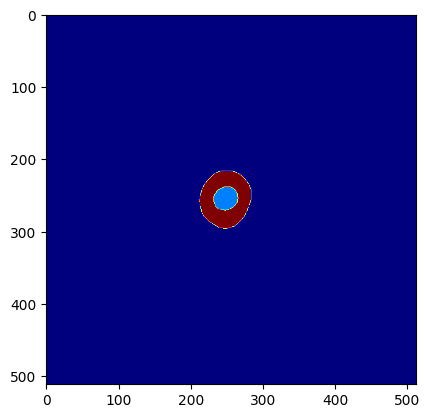

In [43]:
plt.imshow(mask, cmap='jet')